In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import math
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler, QuantileTransformer
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [67]:
#"../dataset/v2_seperate/ecg.csv"
#"../dataset/v2_seperate/fnirs.csv"
#"../dataset/v2_seperate/mec.csv"
#"../dataset/v2_seperate/skin.csv"
#"../dataset/v2_seperate/survey.csv"
#"../dataset/v2_seperate/v2_eda.csv"
#"../dataset/v2_seperate/v2_original.csv"

df = pd.read_csv("../dataset/v2_seperate/fnirs.csv")
y = df['diagnosis_type'].values #diagnosis : 6class, diagnosis_type : 3 class

df.drop(columns=['No', 'diagnosis', 'diagnosis_type'], inplace=True)

X = df.values

In [68]:
df

,HbO_left_DLPFC,HbO_Right_DLPFC,HbO_left_FPC,HbO_Right_FPC,HbO_left_OFC,HbO_Right_OFC,HbO_left_VLPFC,HbO_Right_VLPFC,HbR_left_DLPFC,HbR_Right_DLPFC,...,Right_FPC_Left_OFC_HbT,Right_FPC_Right_OFC_HbT,Right_FPC_Left_VLPFC_HbT,Right_FPC_Right_VLPFC_HbT,Left_OFC_Right_OFC_HbT,Left_OFC_Left_VLPFC_HbT,Left_OFC_Right_VLPFC_HbT,Right_OFC_Left_VLPFC_HbT,Right_OFC_Right_VLPFC_HbT,Left_VLPFC_Right_VLPFC_HbT
0,-0.007039,0.019742,0.007280,0.013764,-0.006629,-0.014963,-0.027847,-0.001437,0.004646,-0.014228,...,0.100411,0.271075,0.224739,0.140409,0.149569,0.110575,-0.152192,0.035071,-0.086905,0.217017
1,0.012898,0.006274,-0.002488,-0.000801,0.013023,0.009605,0.020168,-0.002313,-0.011510,-0.003996,...,0.390883,0.078778,-0.119893,0.205994,0.228543,0.103755,-0.108196,0.269656,-0.242944,0.050180
2,0.013911,0.050665,0.040562,-0.004119,-0.010605,-0.021895,-0.014170,0.016479,-0.011458,-0.026824,...,0.214177,0.306119,-0.151778,-0.172429,0.289006,0.075577,0.176903,0.136371,-0.024937,0.226515
3,0.003595,0.003057,-0.004183,-0.000791,-0.004648,-0.003181,-0.053503,-0.037718,-0.003085,-0.003938,...,0.183915,0.313877,0.169268,0.337518,0.043247,0.208111,0.322240,0.133450,0.258310,-0.006605
4,0.024322,-0.022728,-0.005392,0.024656,-0.015913,-0.025883,0.010916,-0.019111,-0.033236,0.024108,...,-0.070727,-0.089287,-0.059155,-0.151767,-0.163405,-0.045591,-0.020078,0.223998,-0.124358,0.279949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001220,-0.005680,0.009651,0.001341,0.008338,0.036356,0.001486,-0.003025,-0.002603,0.005447,...,0.054812,0.320047,0.048197,0.147814,0.299353,-0.114379,0.109746,-0.130849,0.035859,0.048318
96,0.002567,-0.008613,-0.006259,-0.001978,-0.001920,0.018779,-0.020673,0.053846,-0.001970,0.002967,...,0.094819,-0.187527,0.287392,-0.179216,0.366690,0.258088,-0.160256,0.120809,0.074201,-0.166957
97,0.022292,0.011835,-0.038702,-0.010431,-0.046952,-0.081599,0.013074,-0.006330,-0.019682,-0.007217,...,0.166885,0.262809,-0.151995,-0.098245,0.081900,0.398820,0.383700,0.014538,-0.121647,0.144062
98,0.001458,-0.025324,-0.005972,-0.049742,-0.006259,-0.028369,0.038631,0.006990,-0.000928,0.018472,...,0.384172,0.420858,-0.224682,-0.083806,0.524352,0.007579,0.303002,0.016145,0.070116,0.308015


In [69]:
y = y - 1
y

array([0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1,
       1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2,
       0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 2, 1, 2, 2, 1, 2, 1], dtype=int64)

In [70]:
df.shape

(100, 108)

In [ ]:
import random
from deap import base, creator, tools, algorithms
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

def create_deap_classes():
    try:
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    except AttributeError:
        pass  # 이미 생성된 경우 무시

    try:
        creator.create("Individual", list, fitness=creator.FitnessMax)
    except AttributeError:
        pass  # 이미 생성된 경우 무시

create_deap_classes()
toolbox = base.Toolbox()

# 유전자(특성 선택)를 0 또는 1로 초기화하는 함수 등록
toolbox.register("attr_bool", random.randint, 0, 1)

# 개체 초기화
def initialize_individual():
    return tools.initRepeat(creator.Individual, toolbox.attr_bool, n=X.shape[1])

toolbox.register("individual", initialize_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# ------------------------------------------------
# 1) GA에서 사용하는 적합도 함수 (evalFeatureSelection)
#    -> 여기서 StratifiedKFold를 사용해 cross_val_score 실행
# ------------------------------------------------
def evalFeatureSelection(individual, X, y, cv_folds=4):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if len(selected_features) == 0:
        return (0.0,)  # 선택된 특성이 없으면 피트니스 0

    model = RandomForestClassifier(n_estimators=100, random_state=8923)
    
    # StratifiedKFold로 cv_folds만큼 분할
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=8923)
    
    # cross_val_score에서 StratifiedKFold 객체를 cv로 전달
    scores = cross_val_score(model, X[:, selected_features], y, 
                             cv=skf, scoring='f1_weighted')
    return (scores.mean(),)  # 튜플 형태

toolbox.register("evaluate", evalFeatureSelection, X=X, y=y)

# 유전 연산 등록
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.02)  # mutation probability per gene
toolbox.register("select", tools.selTournament, tournsize=3)

def main():
    create_deap_classes()
    random.seed(8923)

    population = toolbox.population(n=50)  # 초기 인구(개체) 수
    ngen = 20  # 세대 수
    cxpb = 0.7  # 교차 확률
    mutpb = 0.1  # 돌연변이 확률

    # Early Stopping
    patience = 5
    best_fitness = -np.inf
    no_improvement = 0

    best_fitness_per_gen = []
    avg_fitness_per_gen = []

    for gen in range(ngen):
        # 1) 교차/돌연변이로 자손 생성
        offspring = algorithms.varAnd(population, toolbox, cxpb, mutpb)
        
        # 2) 각 자손의 피트니스(f1_macro) 계산
        fits = list(map(toolbox.evaluate, offspring))
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit

        # 3) 다음 세대 선택
        population = toolbox.select(offspring, k=len(population))

        # 4) 현재 세대의 Best 개체
        best_ind = tools.selBest(population, k=1)[0]
        current_best_fitness = best_ind.fitness.values[0]

        best_fitness_per_gen.append(current_best_fitness)
        avg_fitness = np.mean([ind.fitness.values[0] for ind in population])
        avg_fitness_per_gen.append(avg_fitness)
        print(f"[Generation {gen+1}] Best F1 = {current_best_fitness:.4f}, Avg F1 = {avg_fitness:.4f}")

        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            no_improvement = 0
        else:
            no_improvement += 1

        if no_improvement >= patience:
            print(f"\nEarly Stopping triggered at generation {gen+1}.")
            break


    best_ind = tools.selBest(population, k=1)[0]
    selected_features = [i for i, bit in enumerate(best_ind) if bit == 1]

    print("\n--- 최종 선정된 특성 인덱스 ---")
    print(selected_features)
    print(f"Selected Feature Count: {len(selected_features)}")

    if len(selected_features) == 0:
        print("선택된 특성이 없습니다. 성능 측정이 불가능합니다.")
        return

    # 별도 5-Fold 교차 검증
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=8923)
    accuracy_list = []
    f1_list = []

    for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X[:, selected_features], y), 1):
        X_train, X_test = X[train_idx][:, selected_features], X[test_idx][:, selected_features]
        y_train, y_test = y[train_idx], y[test_idx]

        model = RandomForestClassifier(n_estimators=100, random_state=8923)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        f1_m = f1_score(y_test, y_pred, average='weighted')
        accuracy_list.append(acc)
        f1_list.append(f1_m)
        print(f"Fold {fold_idx} => Accuracy: {acc:.4f}, F1: {f1_m:.4f}")

    final_accuracy = np.mean(accuracy_list)
    final_f1 = np.mean(f1_list)
    print(f"\n[최종 교차 검증 결과] Accuracy: {final_accuracy:.4f}, F1: {final_f1:.4f}")

if __name__ == "__main__":
    main()


c:\Users\carly\anaconda3\envs\dyspepsia_research\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\carly\anaconda3\envs\dyspepsia_research\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


[Generation 1] Best F1 = 0.4883, Avg F1 = 0.4299
[Generation 2] Best F1 = 0.4883, Avg F1 = 0.4461
[Generation 3] Best F1 = 0.4883, Avg F1 = 0.4588
[Generation 4] Best F1 = 0.5110, Avg F1 = 0.4684
[Generation 5] Best F1 = 0.5110, Avg F1 = 0.4750
[Generation 6] Best F1 = 0.5110, Avg F1 = 0.4881
[Generation 7] Best F1 = 0.5110, Avg F1 = 0.5008
[Generation 8] Best F1 = 0.5110, Avg F1 = 0.5098
[Generation 9] Best F1 = 0.5110, Avg F1 = 0.5110

Early Stopping triggered at generation 9.

--- 최종 선정된 특성 인덱스 ---
[2, 3, 4, 6, 7, 8, 11, 13, 14, 16, 17, 18, 22, 23, 24, 26, 27, 28, 30, 33, 36, 37, 38, 41, 43, 45, 52, 53, 54, 61, 62, 63, 64, 66, 67, 70, 71, 73, 80, 81, 82, 87, 91, 94, 96, 97, 99, 101, 102, 105, 107]
Selected Feature Count: 51
Fold 1 => Accuracy: 0.5000, F1: 0.4634
Fold 2 => Accuracy: 0.5000, F1: 0.4543
Fold 3 => Accuracy: 0.3500, F1: 0.2593
Fold 4 => Accuracy: 0.6000, F1: 0.5487
Fold 5 => Accuracy: 0.6000, F1: 0.5127

[최종 교차 검증 결과] Accuracy: 0.5100, F1: 0.4477


# GENE - XGBoost

c:\Users\carly\anaconda3\envs\dyspepsia_research\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\carly\anaconda3\envs\dyspepsia_research\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


[Generation 1] Best F1(macro) = 0.5001, Avg F1(macro) = 0.4731
[Generation 2] Best F1(macro) = 0.5092, Avg F1(macro) = 0.4879
[Generation 3] Best F1(macro) = 0.5352, Avg F1(macro) = 0.5011
[Generation 4] Best F1(macro) = 0.5580, Avg F1(macro) = 0.5409
[Generation 5] Best F1(macro) = 0.5580, Avg F1(macro) = 0.5425
[Generation 6] Best F1(macro) = 0.5580, Avg F1(macro) = 0.5423
[Generation 7] Best F1(macro) = 0.5580, Avg F1(macro) = 0.5505

Early Stopping triggered at generation 7.


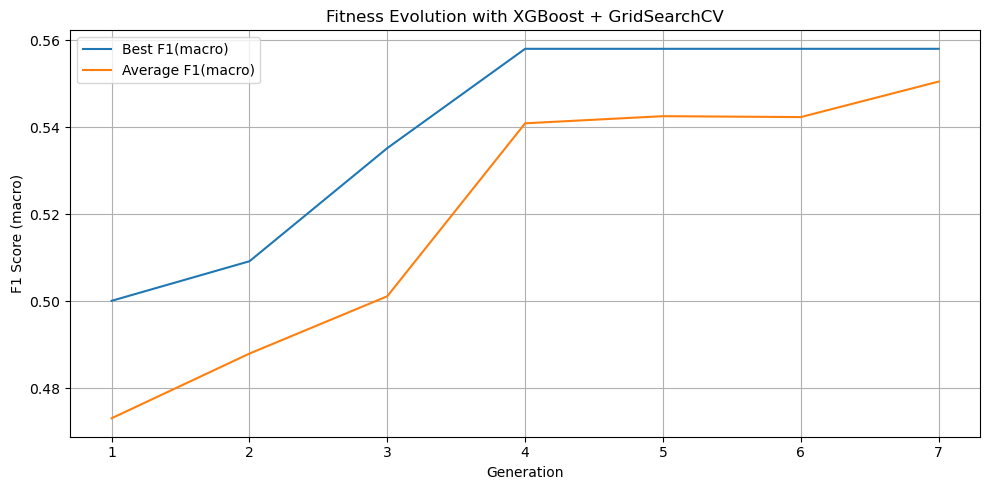


--- 최종 선정된 특성 인덱스 ---
[1, 4, 7, 9, 11, 14, 15, 17, 18, 19, 21, 22, 23, 25, 26, 28, 30, 32, 34, 36, 37, 38, 39, 40, 45, 51, 53, 54, 55, 57, 58, 59, 60, 61, 65, 67, 69, 71, 73, 75, 76, 77, 79, 80, 81, 82, 84, 87, 90, 91, 93, 96, 101, 102, 103, 105]
Selected Feature Count: 56
Fold 1 => Accuracy: 0.5500, F1: 0.5048
Fold 2 => Accuracy: 0.5000, F1: 0.4691
Fold 3 => Accuracy: 0.3000, F1: 0.2308
Fold 4 => Accuracy: 0.5000, F1: 0.5007
Fold 5 => Accuracy: 0.5500, F1: 0.5242

[최종 교차 검증 결과] Accuracy: 0.4800, F1: 0.4459


In [ ]:
import random
from deap import base, creator, tools, algorithms
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from xgboost import XGBClassifier

# (Optional) matplotlib
try:
    import matplotlib.pyplot as plt
    has_matplotlib = True
except ImportError:
    has_matplotlib = False


# ------------------------------------------------
# 1) DEAP의 creator 중복 생성 방지
# ------------------------------------------------
def create_deap_classes():
    try:
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    except AttributeError:
        pass  # 이미 생성되었으면 무시

    try:
        creator.create("Individual", list, fitness=creator.FitnessMax)
    except AttributeError:
        pass  # 이미 생성되었으면 무시

create_deap_classes()

toolbox = base.Toolbox()

# ------------------------------------------------
# 2) 개체(Individual) 생성
#    - 각 특징을 선택(1) / 제외(0)
# ------------------------------------------------
toolbox.register("attr_bool", random.randint, 0, 1)

def initialize_individual():
    return tools.initRepeat(creator.Individual, toolbox.attr_bool, n=X.shape[1])

toolbox.register("individual", initialize_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


# ------------------------------------------------
# 3) GA 평가함수: XGB + GridSearchCV
# ------------------------------------------------
def evalFeatureSelection(individual, X, y, cv_folds=4):
    """
    individual: 0/1로 구성된 feature mask
    X, y: 전체 데이터 (numpy array 등)
    cv_folds: StratifiedKFold 폴드 수
    """
    # 선택된 피처 인덱스 추출
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    # 아무 피처도 선택되지 않은 경우
    if len(selected_features) == 0:
        return (0.0,)

    # XGBoost 하이퍼파라미터 그리드 (예시)
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [3, 5],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    xgb_model = XGBClassifier(
        objective='multi:softprob',
        eval_metric='mlogloss',
        random_state=8923,
    )

    # StratifiedKFold 정의
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=8923)

    # f1_macro를 목표로 GridSearch
    scoring = make_scorer(f1_score, average='weighted')
    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring=scoring,
        cv=skf,
        n_jobs=-1,
        verbose=0
    )

    # 선택된 피처만으로 학습
    grid_search.fit(X[:, selected_features], y)

    # best_score_는 폴드 평균 f1_macro
    return (grid_search.best_score_,)


toolbox.register("evaluate", evalFeatureSelection, X=X, y=y)

# ------------------------------------------------
# 4) 유전 연산 등록 (교차, 돌연변이, 선택)
# ------------------------------------------------
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.02)  # mutation probability per gene
toolbox.register("select", tools.selTournament, tournsize=3)


# ------------------------------------------------
# 5) 메인 함수: GA 실행 + 최종 평가
# ------------------------------------------------
def main():
    create_deap_classes()
    random.seed(8923)

    # GA 초기 설정
    population_size = 20  # 초기 인구 수
    ngen = 10             # 세대 수
    cxpb = 0.7            # 교차 확률
    mutpb = 0.1           # 돌연변이 확률

    # Early Stopping
    patience = 3
    best_fitness = -np.inf
    no_improvement = 0

    # 초기 인구 생성
    population = toolbox.population(n=population_size)

    best_fitness_per_gen = []
    avg_fitness_per_gen = []

    for gen in range(ngen):
        # 1) 자손 생성 (교차 + 돌연변이)
        offspring = algorithms.varAnd(population, toolbox, cxpb, mutpb)
        
        # 2) 각 자손 피트니스 평가 (GridSearchCV 수행)
        fits = list(map(toolbox.evaluate, offspring))
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit

        # 3) 다음 세대 선택
        population = toolbox.select(offspring, k=len(population))

        # 4) 현재 세대의 Best
        best_ind = tools.selBest(population, k=1)[0]
        current_best_fitness = best_ind.fitness.values[0]

        best_fitness_per_gen.append(current_best_fitness)
        avg_fitness = np.mean([ind.fitness.values[0] for ind in population])
        avg_fitness_per_gen.append(avg_fitness)
        print(f"[Generation {gen+1}] Best F1(macro) = {current_best_fitness:.4f}, Avg F1(macro) = {avg_fitness:.4f}")

        # Early Stopping 체크
        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            no_improvement = 0
        else:
            no_improvement += 1

        if no_improvement >= patience:
            print(f"\nEarly Stopping triggered at generation {gen+1}.")
            break

    # (Optional) Fitness 진화 과정 시각화
    if has_matplotlib:
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, len(best_fitness_per_gen)+1), best_fitness_per_gen, 
                 label='Best F1(macro)')
        plt.plot(range(1, len(avg_fitness_per_gen)+1), avg_fitness_per_gen, 
                 label='Average F1(macro)')
        plt.xlabel('Generation')
        plt.ylabel('F1 Score (macro)')
        plt.title('Fitness Evolution with XGBoost + GridSearchCV')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # 최종 선정된 특징 (best_ind)
    best_ind = tools.selBest(population, k=1)[0]
    selected_features = [i for i, bit in enumerate(best_ind) if bit == 1]
    print("\n--- 최종 선정된 특성 인덱스 ---")
    print(selected_features)
    print(f"Selected Feature Count: {len(selected_features)}")

    if len(selected_features) == 0:
        print("선택된 특성이 없습니다. 성능 측정 불가.")
        return

    # 최종 모델 학습/평가 (원하면 한 번 더 GridSearchCV 가능)
    # 여기서는 간단히 "best_ind" 피처만 사용해 모델 성능 측정
    final_xgb = XGBClassifier(
        objective='multi:softprob',
        eval_metric='mlogloss',
        random_state=42,
    )

    # 5-Fold 교차검증
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=8923)
    accuracy_list = []
    f1_list = []

    for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X[:, selected_features], y), 1):
        X_train, X_test = X[train_idx][:, selected_features], X[test_idx][:, selected_features]
        y_train, y_test = y[train_idx], y[test_idx]

        final_xgb.fit(X_train, y_train)
        y_pred = final_xgb.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        f1_m = f1_score(y_test, y_pred, average='weighted')
        accuracy_list.append(acc)
        f1_list.append(f1_m)
        print(f"Fold {fold_idx} => Accuracy: {acc:.4f}, F1: {f1_m:.4f}")

    final_accuracy = np.mean(accuracy_list)
    final_f1 = np.mean(f1_list)
    print(f"\n[최종 교차 검증 결과] Accuracy: {final_accuracy:.4f}, F1: {final_f1:.4f}")


if __name__ == "__main__":
    main()


# CatBoost

In [73]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, make_scorer, accuracy_score
from catboost import CatBoostClassifier


def create_deap_classes():
    try:
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    except AttributeError:
        pass

    try:
        creator.create("Individual", list, fitness=creator.FitnessMax)
    except AttributeError:
        pass

create_deap_classes()

toolbox = base.Toolbox()


# ------------------------------------------------
# 3) 개체(Individual) 생성: 0/1 Feature Mask
# ------------------------------------------------
toolbox.register("attr_bool", random.randint, 0, 1)

def initialize_individual():
    return tools.initRepeat(creator.Individual, toolbox.attr_bool, n=X.shape[1])

toolbox.register("individual", initialize_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


# ------------------------------------------------
# 4) GA 평가함수: CatBoost + GridSearchCV (Weighted F1)
# ------------------------------------------------
def evalFeatureSelection(individual, X, y, cv_folds=4):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if len(selected_features) == 0:
        return (0.0,)  # 아무 특성도 없으면 점수 0

    param_grid = {
        'iterations': [100, 200],
        'depth': [3, 5],
        'learning_rate': [0.01, 0.1],
        'l2_leaf_reg': [1, 5],
        'rsm': [0.8, 1.0]
    }

    # CatBoost 모델
    cat_model = CatBoostClassifier(
        loss_function='MultiClass',
        random_seed=1557,
        verbose=0
    )

    # 교차검증/스코어링 설정
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=1557)
    scoring = make_scorer(f1_score, average='weighted')

    grid_search = GridSearchCV(
        estimator=cat_model,
        param_grid=param_grid,
        scoring=scoring,
        cv=skf,
        n_jobs=-1,
        verbose=0
    )

    # 선택된 피처만으로 학습 + 튜닝
    grid_search.fit(X[:, selected_features], y)

    # grid_search.best_score_ => 교차검증 평균 Weighted F1
    return (grid_search.best_score_,)


toolbox.register("evaluate", evalFeatureSelection, X=X, y=y)


# ------------------------------------------------
# 5) 유전 연산 (교차, 돌연변이, 선택) 등록
# ------------------------------------------------
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.02)
toolbox.register("select", tools.selTournament, tournsize=3)


# ------------------------------------------------
# 6) 메인: GA 실행 + 최종 평가
# ------------------------------------------------
def main():
    create_deap_classes()
    random.seed(1557)

    # GA 파라미터
    population_size = 20   # 초기 인구
    ngen = 10              # 세대 수
    cxpb = 0.7             # 교차 확률
    mutpb = 0.1            # 돌연변이 확률

    # Early Stopping
    patience = 3
    best_fitness = -np.inf
    no_improvement = 0

    # 1) 초기 인구 생성
    population = toolbox.population(n=population_size)

    best_fitness_per_gen = []
    avg_fitness_per_gen = []

    for gen in range(ngen):
        # (a) 자손 생성 (교차+돌연변이)
        offspring = algorithms.varAnd(population, toolbox, cxpb, mutpb)
        
        # (b) 각 자손의 피트니스 계산 (CatBoost + GridSearchCV)
        fits = list(map(toolbox.evaluate, offspring))
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit

        # (c) 다음 세대 선택
        population = toolbox.select(offspring, k=len(population))

        # (d) 현재 세대 Best
        best_ind = tools.selBest(population, k=1)[0]
        current_best_fitness = best_ind.fitness.values[0]

        best_fitness_per_gen.append(current_best_fitness)
        avg_fitness = np.mean([ind.fitness.values[0] for ind in population])
        avg_fitness_per_gen.append(avg_fitness)

        print(f"[Generation {gen+1}] Best F1(weighted) = {current_best_fitness:.4f}, Avg F1 = {avg_fitness:.4f}")

        # Early Stopping 여부 체크
        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            no_improvement = 0
        else:
            no_improvement += 1

        if no_improvement >= patience:
            print(f"\nEarly Stopping triggered at generation {gen+1}.")
            break

    # (선택) Fitness 진화 과정 시각화
    if has_matplotlib:
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, len(best_fitness_per_gen)+1), best_fitness_per_gen, label='Best F1(weighted)')
        plt.plot(range(1, len(avg_fitness_per_gen)+1), avg_fitness_per_gen, label='Average F1(weighted)')
        plt.xlabel('Generation')
        plt.ylabel('F1 Score (weighted)')
        plt.title('Fitness Evolution (CatBoost + GridSearchCV)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # ---------------------------------------------------------
    # 최종 선정된 피처 확인 + 별도 교차검증 평가 (원하면 CatBoost 재튜닝)
    # ---------------------------------------------------------
    best_ind = tools.selBest(population, k=1)[0]
    selected_features = [i for i, bit in enumerate(best_ind) if bit == 1]
    print("\n--- 최종 선정된 특성 인덱스 ---")
    print(selected_features)
    print(f"Selected Feature Count: {len(selected_features)}")

    if len(selected_features) == 0:
        print("선택된 특성이 없습니다. 성능 측정 불가.")
        return

    # 최종 평가(간단하게 CatBoost 기본 설정 + 5-Fold CV)
    final_cat = CatBoostClassifier(loss_function='MultiClass', random_seed=1557, verbose=0)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1557)
    accuracy_list = []
    f1_list = []

    for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X[:, selected_features], y), 1):
        X_train, X_test = X[train_idx][:, selected_features], X[test_idx][:, selected_features]
        y_train, y_test = y[train_idx], y[test_idx]

        final_cat.fit(X_train, y_train)
        y_pred = final_cat.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        f1_w = f1_score(y_test, y_pred, average='weighted')
        accuracy_list.append(acc)
        f1_list.append(f1_w)
        print(f"Fold {fold_idx} => Accuracy: {acc:.4f}, F1(weighted): {f1_w:.4f}")

    final_acc = np.mean(accuracy_list)
    final_f1 = np.mean(f1_list)
    print(f"\n[최종 교차 검증 결과] Accuracy: {final_acc:.4f}, F1(weighted): {final_f1:.4f}")


if __name__ == "__main__":
    main()


c:\Users\carly\anaconda3\envs\dyspepsia_research\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\carly\anaconda3\envs\dyspepsia_research\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


KeyboardInterrupt: 